# Analysis of penetration of renewables

This notebook shows how to use [utils function](https://github.com/corradio/electricitymap/tree/master/datascience#data-science). In particular we show how to show to % of power production coming from renewables, in a some countries. 

In [6]:
# Import Electricity Map utilities
from utils import *

# Enable inline plotting
%matplotlib inline 
import matplotlib.pyplot as plt

In [7]:
# Fetch data
country_codes = ['DE', 'DK', 'FR']
df_production = get_production(country_codes, '2017-01-01', '2017-01-16', 60)

Fetching country DE..
Fetching country DK..
Fetching country FR..


In [8]:
# Show the tail of the data frame
df_production.head()

,country,mode,production,timestamp
0,DE,oil,NaN,2017-01-01 08:00:00+00:00
1,DE,nuclear,6518.0,2017-01-01 08:00:00+00:00
2,DE,gas,1694.0,2017-01-01 08:00:00+00:00
3,DE,biomass,4733.0,2017-01-01 08:00:00+00:00
4,DE,coal,17373.0,2017-01-01 08:00:00+00:00


In [9]:
# Compute % of renewable production in each country
is_renewable = (df_production['mode'] == 'hydro') | (df_production['mode'] == 'wind') | (df_production['mode'] == 'solar')
df_renewable_production = df_production[is_renewable].groupby(['timestamp', 'country']).sum()
df_renewable_production['total'] = df_production.groupby(['timestamp', 'country']).sum()
df_renewable_production['ratio'] = df_renewable_production['production'] / df_renewable_production['total']
df_renewable_production.head()

,,production,total,ratio
timestamp,country,,,
2017-01-01 00:00:00+00:00,FR,6667.0,69369.0,0.096109
2017-01-01 01:00:00+00:00,FR,6075.0,68585.0,0.088576
2017-01-01 02:00:00+00:00,FR,5755.0,67242.0,0.085586
2017-01-01 03:00:00+00:00,FR,5412.0,66127.0,0.081843
2017-01-01 04:00:00+00:00,FR,4813.0,65851.0,0.073089


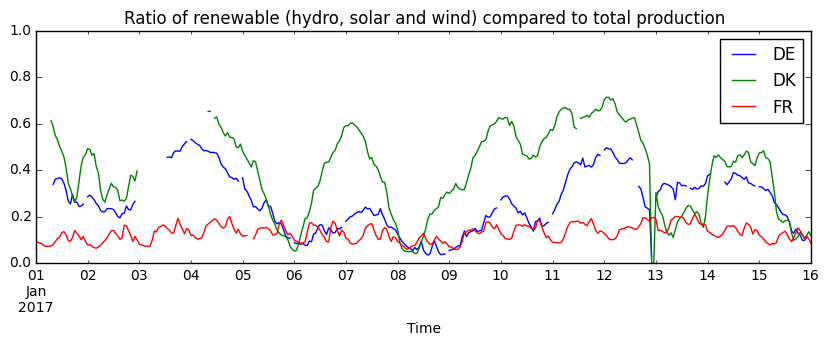

In [10]:
# Plot ratio of renewable
plt.figure(figsize=(10,3));
df_renewable_production.filter(['ratio']).unstack().plot(ax=plt.gca());
plt.title('Ratio of renewable (hydro, solar and wind) compared to total production');
plt.legend(country_codes);
plt.xlabel('Time');
plt.ylim([0, 1]);